In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def loss (y, y_hat):
    return (y - y_hat)**2 / 2

def deriv_loss (y, y_hat):
    return y_hat - y

def MSE (y, y_hat):
    return np.mean((y - y_hat)**2)

In [5]:
m = 1000; small = 0.01

In [6]:
alpha = 0.5; gamma = 0.5; a = 0

def Phi (x, beta, A, u):
    return (beta.T / m**alpha) @ (A / m**gamma) @ u * x

def deriv_beta (x, beta, A, u):
    return (1 / m**alpha) * (A / m**gamma) @ u * x

def deriv_A (x, beta, A, u):
    return (x / m**(alpha + gamma)) * np.outer(beta, u)

def deriv_u (x, beta, A, u):
    return (beta.T / m**alpha) @ (A / m**gamma) * x

def update (x, y, beta, A, u):
    
    y_hat = Phi(x, beta, A, u)
    
    beta_old = beta
    A_old = A
    u_old = u
    
    eta = small * m**a
    
    beta -= eta * deriv_loss(y, y_hat) * deriv_beta(x, beta_old, A_old, u_old)
    A    -= eta * deriv_loss(y, y_hat) * deriv_A(x, beta_old, A_old, u_old)
    u    -= eta * deriv_loss(y, y_hat) * deriv_u(x, beta_old, A_old, u_old)
    
    return (beta, A, u)
def train (X, Y, n, beta, A, u):
    
    for k in range(n):
        i = np.random.randint(Y.size)
        x = X[i]; y = Y[i]
        
        beta, A, u = update(x, y, beta, A, u)
    
    return beta, A, u

In [7]:
X = np.random.randint(0,5,size=1000)
Y = np.copy(X)

n = 100

In [8]:
beta = np.random.normal(0,1,m)
A = np.random.normal(0,1,(m,m))
u = np.random.normal(0,1,m)

beta, A, u = train(X[0:949],Y[0:949],n,beta,A,u)

In [9]:
pred = np.array([Phi(x, beta, A, u) for x in Y[950:999]])

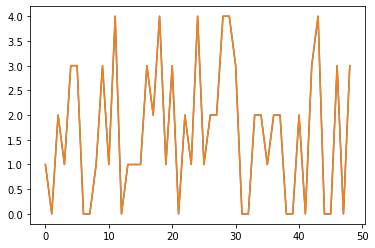

In [10]:
plt.plot(pred)
plt.plot(Y[950:999])

In [11]:
MSE(Y[950:999], pred)

1.459788142877451e-18